In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('/content/ds_salaries.csv', index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
data.shape

(607, 11)

Data contains 11 attribute and 607 record

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


The dataset has 2 data types:
*   4 numeric columns: work_year, salary, salary_in_usd, remote_ratio
*   7 categorical columns: experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size



In [7]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Dataset has no null values

In [8]:
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [9]:
data.duplicated().sum()

42

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(565, 11)

In [11]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000




*   Data is collected between years 2020 and 2022
*   Salary range is from 2859 USD and 600000 USD
*   75% of Salaries are upove 15000 USD



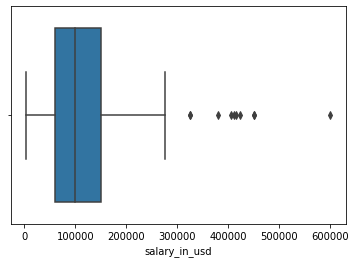

In [12]:
sns.boxplot(data=data , x='salary_in_usd')
plt.show()

All salaries above 300000 are outliers

<Axes: >

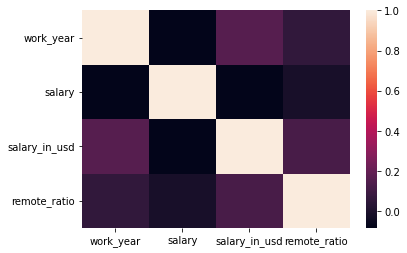

In [13]:
sns.heatmap(data.corr())

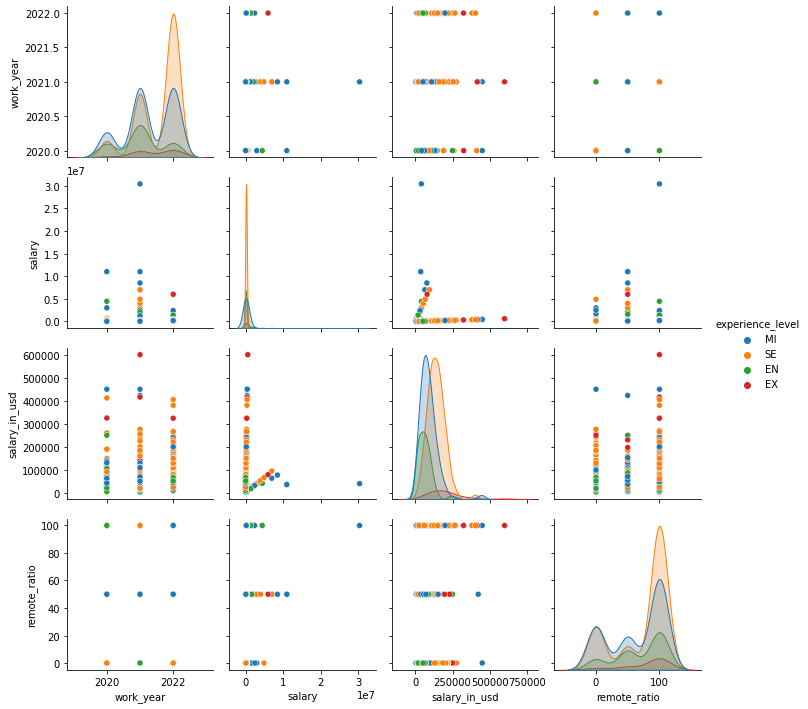

In [14]:
sns.pairplot(data=data,hue='experience_level')
plt.show()

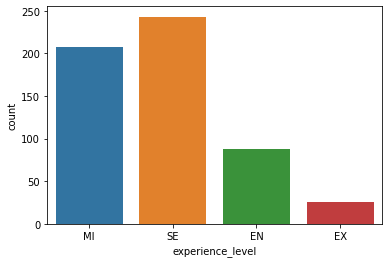

In [15]:
sns.countplot(data= data ,x = 'experience_level')
plt.show()

From the plot we can find that the employees with experince level Senior level 'SE' are the top existing employees then the Mid level 'MI'. This explanes the reason of the high salaries in the dataset.

The count of jobs for Entry and Executive level is low.

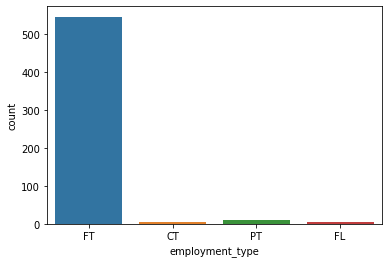

In [16]:
sns.countplot(data= data ,x = 'employment_type')
plt.show()

In [17]:
data.job_title.nunique()

50

There are 50 unique job title which are:

In [18]:
data.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

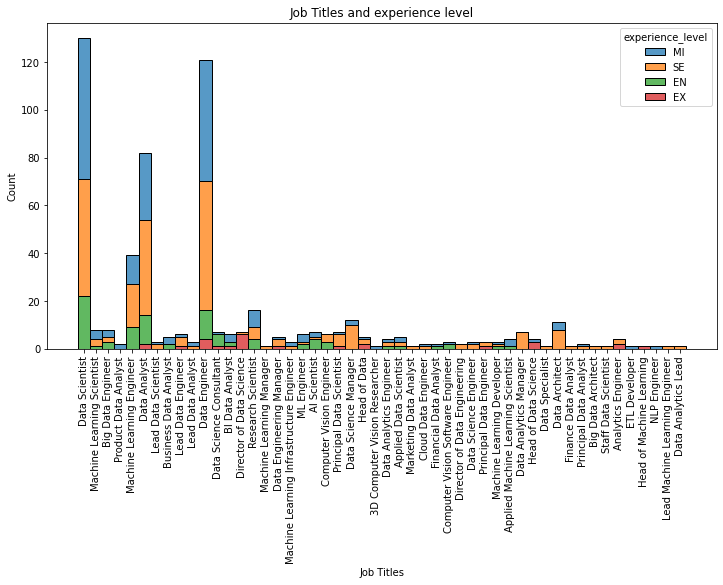

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data = data, x = 'job_title', hue = 'experience_level', multiple="stack" ,ax =ax)
plt.title('Job Titles and experience level')
plt.xlabel('Job Titles')
plt.xticks(rotation = 90)
plt.show()

The dataset has a remarkable count of job title where "Data scientist" are the top existed job title with more then 120 employees differe between Mid level, senior level, and entry level experience then Data Engineer, Data Analyst and Machine learning Engineer.


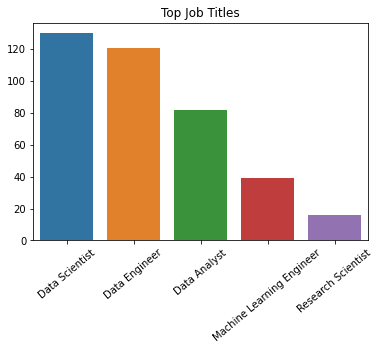

In [20]:
counts = data['job_title'].value_counts()
sns.barplot(x = counts.index[:5], y = counts.values[:5])
plt.title('Top Job Titles')
plt.xticks(rotation = 40)
plt.show()

Jobs related to data field are most popular

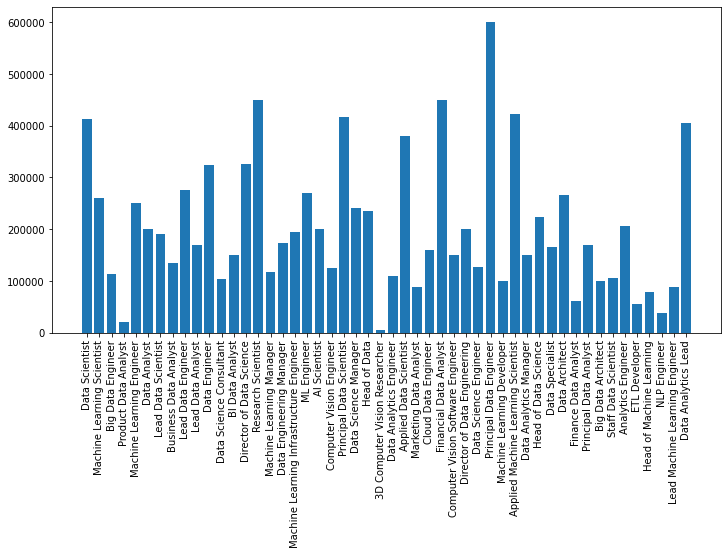

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(data['job_title'], data['salary_in_usd'])
plt.xticks(rotation = 90)
plt.show()

While the data scientist are the top in the dataset, Principle Data Engineer has the highest salary in the dataset
 

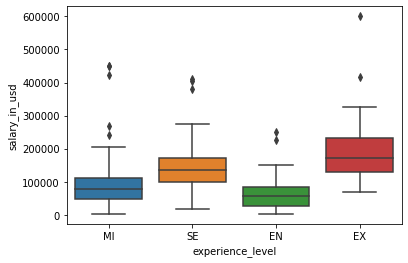

In [22]:
sns.boxplot(data=data , x='experience_level', y = 'salary_in_usd')
plt.show()

The avarage of expert level is higher than the other levels

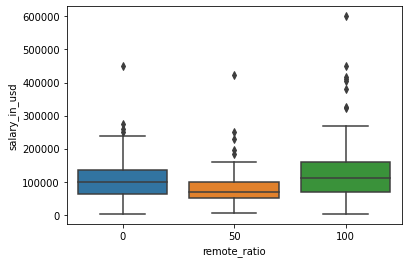

In [23]:
sns.boxplot(data= data, x= 'remote_ratio', y='salary_in_usd' )
plt.show()

Remote jobs earn more than non remotly jobs and more than 50% remote job

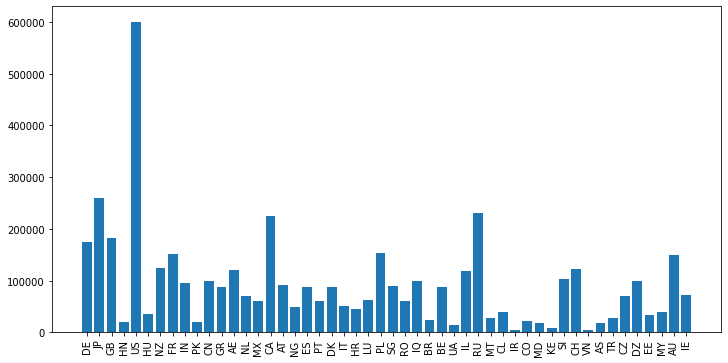

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(data['company_location'], data['salary_in_usd'])
plt.xticks(rotation = 90)
plt.show()

US then JP then RU then CA are the top paid salaries countries

In [25]:
sal = data[data['company_location'] == 'US']
sal.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L


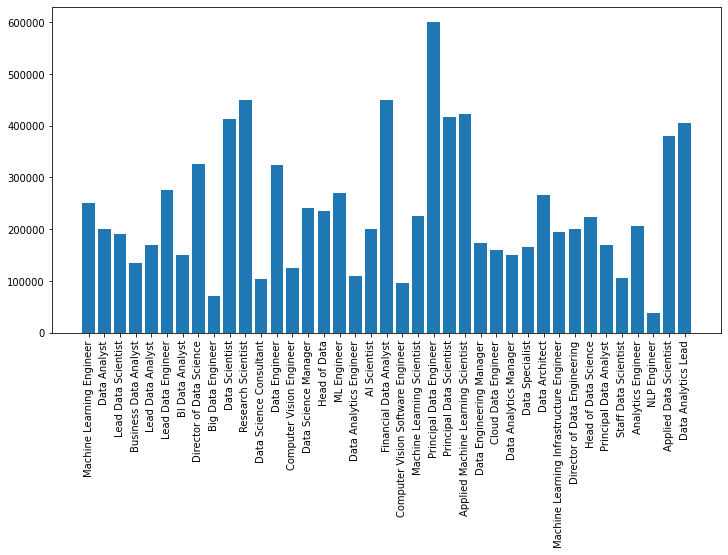

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(sal['job_title'], sal['salary_in_usd'])
plt.xticks(rotation = 90)
plt.show()

In US Principal Data Scientist earn the highest salary then Financial Data Analytics and Research Scientest